# Data Analytics and Visualization (part 3)

## Matplotlib
Matplotlib is a powerful plotting library used for creating static, interactive, and animated visualizations in Python. It provides a wide array of functions and tools to generate graphs and plots, making it one of the most popular data visualization tools in the data science and analytics community. 

Let's start by importing our libraries:

In [1]:
#Import needed libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Load the covid_19_cleaned.csv dataset
file_path = 'Results/covid_19_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Pierre-Miquelon,North-America,5759.0,2024-06-30,2024-06-30T16:15:16+00:00,3452,2449.0,2.0,25400.0
1,Isle-of-Man,Europe,85732.0,2024-06-30,2024-06-30T16:15:14+00:00,38008,0.0,116.0,150753.0
2,Somalia,Africa,16841795.0,2024-06-30,2024-06-30T16:15:14+00:00,27334,13182.0,1361.0,400466.0
3,Comoros,Africa,907419.0,2024-06-30,2024-06-30T16:15:15+00:00,9109,8939.0,161.0,0.0
4,Aruba,North-America,107609.0,2024-06-30,2024-06-30T16:15:14+00:00,44224,42438.0,292.0,177885.0


### Line Plot
Line plots are used to visualize trends and changes in data over a continuous range, or time. We use line plots when we have data that can be represented as a series of points connected by lines, such as time series data or data with a natural ordering.

Let's create a simple line plot with Matplotlib to visualize COVID-19 case metrics for the top 10 countries:

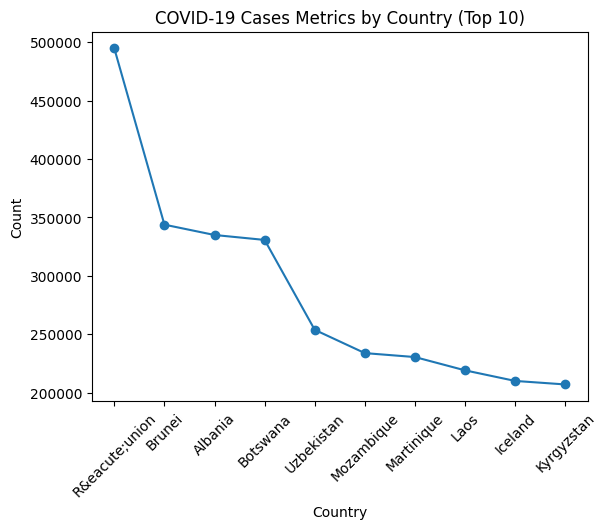

In [9]:
# Sort by Cases and select top 10 countries
top_countries = df.sort_values(by = 'Cases', ascending = False).head(10)

x = top_countries['country']
y = top_countries['Cases']

plt.plot(x, y, marker = 'o')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('COVID-19 Cases Metrics by Country (Top 10)')
plt.xticks(rotation = 45)
plt.show()


The line plot shows the number of COVID-19 cases across the top 10 countries with the highest case counts. Each point represents a country, and the line helps visualize how the case numbers vary from one country to another. The trend highlights which countries are most affected and how the cases compare among them.

#### Code Explanation
- **x** and **y** represent the sample data points that we want to plot.
- **plt.plot(x, y)**: This line creates a basic line plot using the plot function. It takes x and y as arguments to plot the data points.
- **plt.xlabel()** and **plt.ylabel()**: These lines label the X and Y axes, respectively, providing context for the plot.
- **plt.title()**: This line adds a title to the plot.
- **plt.show()**: This function displays the plot on the screen.

#### Exercise 1
You are given the monthly average temperatures (in degrees Celsius) in a city for a year. Create a line plot to visualize the temperature trend over the year. The data is provided in the form of two lists: months (containing the month names) and temperatures (containing the corresponding average temperatures).

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temperatures = [10, 11, 15, 18, 22, 25, 28, 28, 25, 20, 15, 11]

- Create a line plot that shows the temperature trend over the year.
- Add appropriate labels to the X and Y axes.
- Add a title to the plot to indicate what it represents.


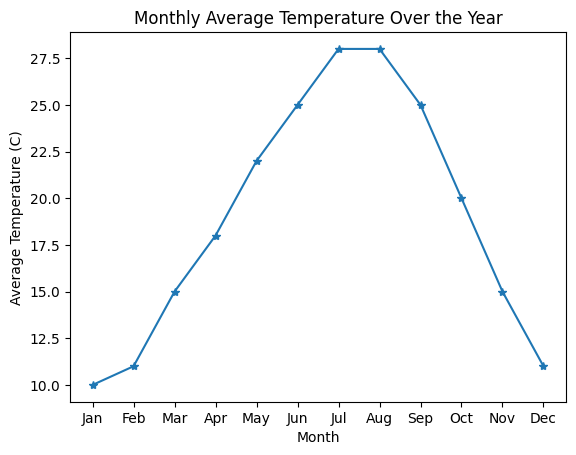

In [12]:
#Data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temperatures = [10, 11, 15, 18, 22, 25, 28, 28, 25, 20, 15, 11]

#Create a line plot
plt.plot(months,temperatures, marker = '*')

#Label the X and Y axes
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')

#Add a title
plt.title('Monthly Average Temperature Over the Year')

#Display the plot
plt.show()

### Scatter Plot
Scatter plots are used to visualize individual data points as dots on a two-dimensional plane. They are valuable for identifying patterns, trends, and relationships between two variables. 

We'll create a scatter plot using Matplotlib to explore the relationship between total COVID-19 tests and total cases by country.


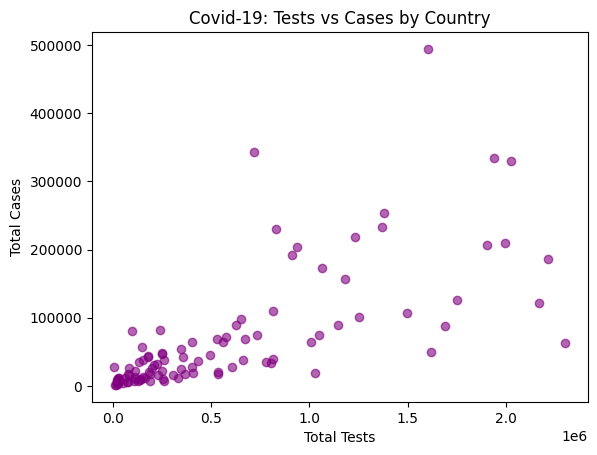

In [22]:
from matplotlib.ticker import ScalarFormatter
filtered_df = df[ (df['Tests'] > 0) & (df['Cases'] > 0)]
x = filtered_df['Tests']
y = filtered_df['Cases']

plt.scatter(x,y, color = 'purple', alpha = 0.6)

# Disable scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
#plt.gca(): Gets the current Axes object (the plot you're currently working on).
#.xaxis: Accesses the x-axis of that plot.
#.set_major_formatter(...): Sets how the major ticks (the main labels) on the axis are formatted.
#ScalarFormatter(): This is a Matplotlib formatter that displays numbers as regular (plain) numbers, not scientific notation like 1e6.
#useMathText=False: Tells Matplotlib not to use LaTeX-like math fonts for numbers.

plt.xlabel('Total Tests')
plt.ylabel('Total Cases')
plt.title('Covid-19: Tests vs Cases by Country')
plt.show()

This scatter plot shows the relationship between the total number of COVID-19 tests and total confirmed cases by country. There is a clear positive correlation, countries that conducted more tests generally reported more cases, which is expected as increased testing typically leads to higher case detection. 

Most of the countries are clustered in the lower-left area of the plot, indicating relatively low testing and case numbers, likely corresponding to smaller populations or limited resources. A few countries stand out with significantly higher testing and case counts, suggesting either large populations or severe outbreaks. Interestingly, some countries appear to have conducted a high number of tests while maintaining relatively low case numbers, which could reflect effective containment strategies or proactive mass testing. 

Overall, the plot highlights how testing volume influences reported cases and reveals disparities in testing and outbreak levels across countries.

#### Code Explanation
- **x = df['Tests'] and y = df['Cases']**: These lines select the 'Tests' and 'Cases' columns from the DataFrame as the data for the x and y axes.
- **plt.scatter(x, y, color='purple', alpha=0.6)**: This creates a scatter plot with purple dots that are slightly transparent (due to alpha=0.6).
- **plt.xlabel('Total Tests') and plt.ylabel('Total Cases')**: These label the x-axis and y-axis for clarity.
- **plt.title()**: Adds a title to the plot.
- **plt.grid(True)**: Displays a grid on the plot for easier reading of values.
- **plt.tight_layout()**: Adjusts the plot layout to prevent overlap of elements.
- **plt.show()**: Displays the final plot.

### Bar Chart
Bar charts represent categorical data with discrete bars, making it easy to compare values across different categories. We use bar charts when we want to compare data across categories, show rankings, or display frequencies or counts for discrete items.

We'll create a bar chart using Matplotlib to compare the total number of COVID-19 deaths across the top 10 most affected countries:

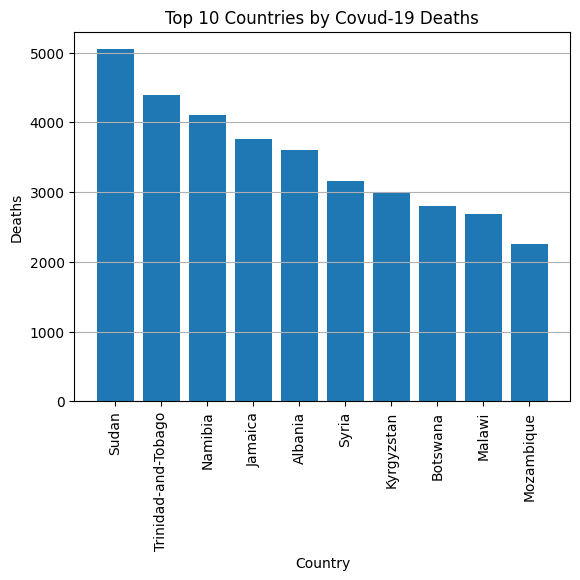

In [32]:
top_countries = df.sort_values(by = 'Deaths', ascending = False).head(10)

plt.bar(top_countries['country'], top_countries['Deaths'])

plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Top 10 Countries by Covud-19 Deaths')
plt.grid(axis= 'y')
plt.show()

The bar chart provides a clear visual comparison of COVID-19 deaths across the top 10 countries. Each bar represents a country, and the height of the bar corresponds directly to the number of deaths reported. This makes it easy to quickly identify which countries have the highest death tolls, it helps viewers intuitively grasp the relative scale of the impact in each country.

#### Code Explanation
- **top_countries = df.sort_values(by='Deaths', ascending=False).head(10)**: This line selects the top 10 countries with the highest number of deaths by sorting the dataframe in descending order.
- **plt.bar(top_countries['country'], top_countries['Deaths'])**: Creates a bar chart where each bar represents a country, and the height corresponds to its total deaths.
- **plt.xticks(rotation=45)**: Rotates the country names on the x-axis by 45 degrees for better readability.
- **plt.xlabel('Country') and plt.ylabel('Deaths')**: Label the x-axis and y-axis to show what each axis represents.
- **plt.title('Top 10 Countries by COVID-19 Deaths')**: Adds a descriptive title to the chart.
- **plt.grid(axis='y')**: Adds horizontal grid lines to the y-axis, making it easier to compare bar heights.
- **plt.show()**: Displays the final plot.

### Histogram
Histograms are used to visualize the distribution of a single continuous variable. They divide the data into bins or intervals and show the frequency or count of data points in each bin. We use histograms when we want to understand the shape of a dataset’s distribution, identify central tendencies (mean, median, mode), and observe data skewness or the presence of multiple peaks.

We'll use Matplotlib to create a histogram showing the distribution of COVID-19 recovery rates across countries:

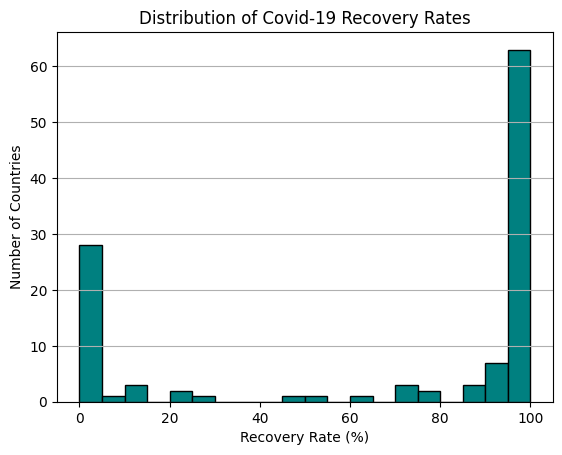

In [42]:
df['RecoveryRate'] = (df['Recovered']/df['Cases']) * 100

plt.hist(df['RecoveryRate'], bins = 20, color = 'teal', edgecolor = 'black')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Covid-19 Recovery Rates')
plt.grid(axis = 'y')
plt.show()

The histogram shows the distribution of COVID-19 recovery rates across countries, revealing two dominant patterns. A significant number of countries report very high recovery rates, clustered near 100%, indicating that nearly all recorded cases in those countries are marked as recovered. Conversely, there is another noticeable cluster near 0%, which likely reflects countries with missing or incomplete recovery data rather than genuinely low recovery rates. 

Very few countries fall within the mid-range of recovery rates (between 20% and 80%), suggesting that most countries either report full recovery or have little to no recovery data available. This uneven distribution highlights potential inconsistencies in how recovery data is recorded or reported across different regions.

#### Code Explanation
- **df['RecoveryRate'] = (df['Recovered'] / df['Cases']) * 100**: This line calculates the COVID-19 recovery rate for each country as a percentage.
- **plt.hist(df['RecoveryRate'], bins=10, color='teal', edgecolor='black')**: This line creates a histogram showing the distribution of recovery rates across countries. It uses 10 bins, sets the bar color to teal, and outlines each bar in black.
- **plt.xlabel('Recovery Rate (%)') and plt.ylabel('Number of Countries')**: These lines label the x-axis and y-axis, making it clear that the chart shows recovery rates and how many countries fall into each range.
- **plt.title('Distribution of COVID-19 Recovery Rates')**: Adds a descriptive title to explain what the histogram represents.
- **plt.grid(axis='y')**: Adds horizontal grid lines to improve readability of bar heights.
- **plt.show()**: Renders and displays the plot.

### Pie Chart
Pie charts show the composition of a whole by dividing it into segments, typically representing proportions or percentages. We use pie charts when we want to visualize how individual components contribute to a whole, but be cautious with complex datasets or too many segments, as they can be challenging to interpret.

We'll create a pie chart using Matplotlib to visualize the share of total COVID-19 cases by continent:


Grouped Series:
 continent
Africa           2708546
Asia             1387786
Europe            974106
North-America    1355744
Oceania           421516
South-America     256696
Unknown              721
Name: Cases, dtype: int64


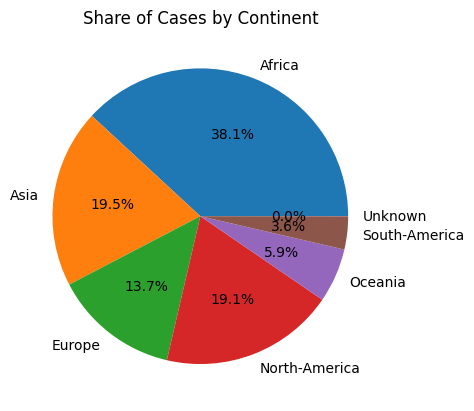

In [52]:
continent_cases = df.groupby('continent')['Cases'].sum()
print("Grouped Series:\n", continent_cases)
plt.pie(continent_cases, labels = continent_cases.index, autopct = '%1.1f%%')
plt.title('Share of Cases by Continent')
plt.show()

The pie chart shows the proportion of total COVID-19 cases by continent. Each wedge represents a continent, and its size reflects the share of cases from that region. 

For example, the continent with the largest number of cases, Africa, appears as the biggest segment in the chart. This makes it easy to visually compare how the pandemic has impacted different continents and quickly identify which regions have been most affected.

#### Code Explanation
- **continent_cases = df.groupby('continent')['Cases'].sum()**: This groups the data by continent and calculates the total number of COVID-19 cases for each one.
- **plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%')**: This generates a pie chart where each slice represents a continent. labels=continent_cases.index sets the continent names as labels. autopct='%1.1f%%' displays the percentage of total cases for each continent.
- **plt.title('Share of Cases by Continent')**: Adds a title to the pie chart.
- **plt.show()**: Displays the pie chart.

#### Exercise 2
You have survey data that shows the distribution of favorite pizza toppings among a group of 100 people. Create a pie chart to visualize the distribution of pizza topping preferences. The data is provided in the form of a dictionary where each topping is a key, and the corresponding value is the number of people who chose that topping as their favorite.

pizza_toppings = {
    'Pepperoni': 30,
    'Mushroom': 20,
    'Margherita': 15,
    'Vegetarian': 10,
    'Supreme': 10,
    'Hawaiian': 5,
    'Other': 10
}

- Create a pie chart that displays the distribution of favorite pizza toppings.
- Label each slice of the pie chart with the topping name and the percentage of people who chose it as their favorite.
- Add a title to the pie chart to describe its purpose.
- Bonus: Highlight the slice with the most popular topping using the *explode* parameter of Matplotlib.


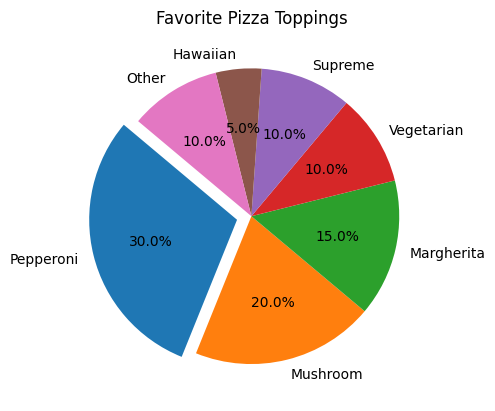

In [63]:
#Data
pizza_toppings = { 
    'Pepperoni': 30, 
    'Mushroom': 20, 
    'Margherita': 15, 
    'Vegetarian': 10, 
    'Supreme': 10, 
    'Hawaiian': 5, 
    'Other': 10 
}

#Extract labels and sized from the dictionary
labels = list(pizza_toppings.keys())
sizes = list(pizza_toppings.values())

#Explode the slice with the most popular topping
explode = (0.1,0,0,0,0,0,0)

#Create a pie chart
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', explode = explode, startangle =140)

#Add Title
plt.title('Favorite Pizza Toppings')

#Display the pie chart
plt.show()


### Subplots
Subplots in data visualization divide a figure into smaller plots, displaying various data representations in a shared space. They aid in comparisons, correlations, and juxtaposition of datasets, highlighting distinct data parts and dimensions, and improving understanding and depth of data findings.

Let's walk through creating a figure with multiple subplots, each showcasing a different type of plot explained above. 

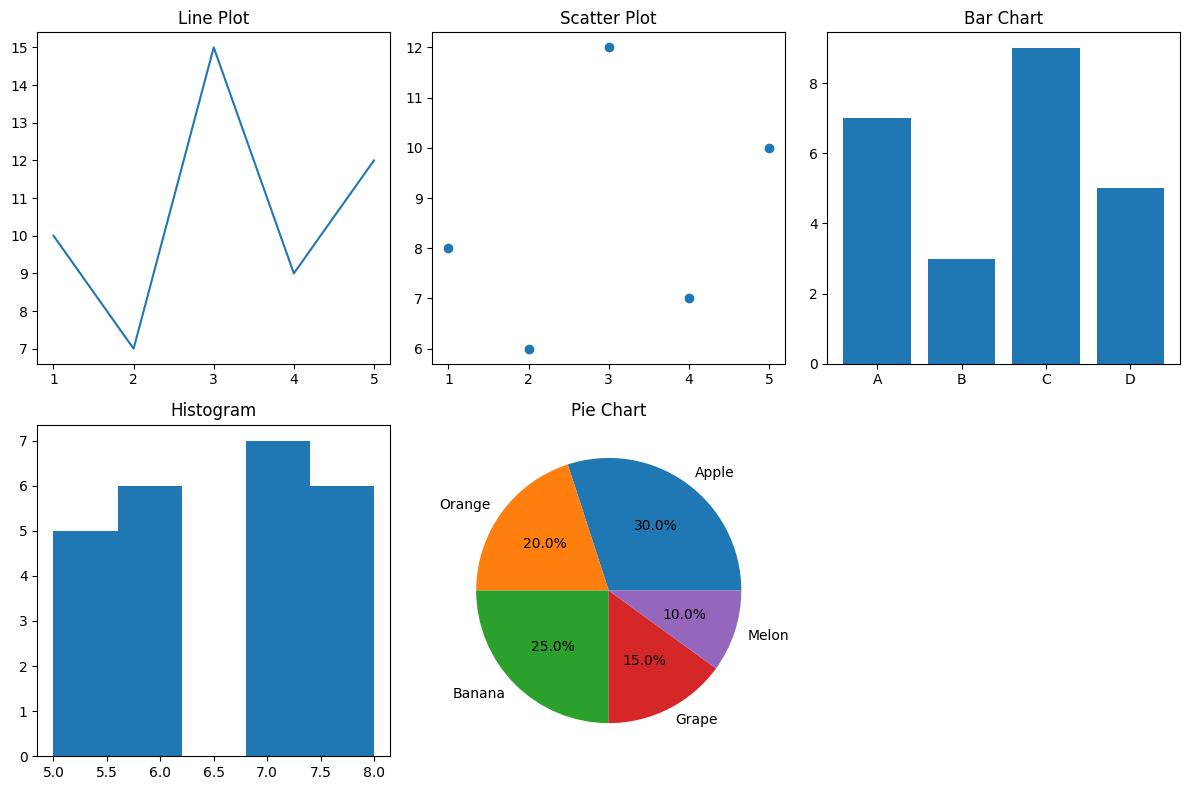

In [76]:
# Creating data for plots
x = [1,2,3,4,5]
y = [10,7,15,9,12]

# Creating figure and subplots
fig , axs = plt.subplots(2,3, figsize = (12,8))

# Line plot
axs[0,0].plot(x,y)
axs[0,0].set_title('Line Plot')

# Scatter plot
scatter_y = [8,6,12,7,10]
axs[0,1].scatter(x, scatter_y)
axs[0,1].set_title('Scatter Plot')

# Bar chart
categories = ['A','B','C','D']
values = [7,3,9,5]
axs[0,2].bar(categories,values)
axs[0,2].set_title('Bar Chart')

# Histogram
hist_data = [5,7,6,8,5,7,8,6,7,8,6,5,7,6,8,7,5,7,6,8,7,5,6,8]
axs[1,0].hist(hist_data, bins = 5)
axs[1,0].set_title('Histogram')

# Pie chart
sizes = [30,20,25,15,10]
labels = ['Apple', 'Orange', 'Banana', 'Grape', 'Melon']
axs[1,1].pie(sizes, labels= labels, autopct = '%1.1f%%')
axs[1,1].set_title('Pie Chart')

# Removing empty subplot
fig.delaxes(axs[1,2])

# Adjusting layout
plt.tight_layout()

# Showing the plots
plt.show()

#### Code Explanation
- **fig, axs = plt.subplots(2, 3, figsize=(12, 8))** generates a figure with a 2x3 grid of subplots and sets its size to 12x8 inches.
- **Line Plot:**
    - **axs[0, 0].plot(x, y):** Plots a line graph using x as the x-axis values and y as the y-axis values.
    - **axs[0, 0].set_title('Line Plot'):** Sets the title for the line plot subplot.
- **Scatter Plot:**
    - **scatter_y = [8, 6, 12, 7, 10]**: Defines a list of y-axis values for a scatter plot.
    - **axs[0, 1].scatter(x, scatter_y)**: Creates a scatter plot using x values against scatter_y.
- **Bar Chart:**
    - **categories = ['A', 'B', 'C', 'D']**: Represents categories for the bar chart.
    - **values = [7, 3, 9, 5]**: Defines values corresponding to each category.
    - **axs[0, 2].bar(categories, values)**: Generates a bar chart with categories on the x-axis and values on the y-axis.
- Histogram:
    - **hist_data**: Represents data for the histogram.
    - **axs[1, 0].hist(hist_data, bins=5)**: Creates a histogram with hist_data and 5 bins.
- Pie Chart:
    - **sizes**: Contains sizes representing portions of a pie chart.
    - **labels**: Represents labels for each portion in the pie chart.
    - **axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%')**: Generates a pie chart with specified sizes and labels, displaying percentages.
    - **axs[1, 1].set_title('Pie Chart')**: Sets the title for the pie chart subplot.
- **fig.delaxes(axs[1, 2])** removes an empty subplot at position (1, 2).
- **plt.tight_layout()** adjusts the layout of subplots to avoid overlapping.
- **plt.show()** displays the generated subplots containing the line plot, scatter plot, bar chart, histogram, and pie chart.

## Seaborn
Seaborn is a popular Python data visualization library that is often used in conjunction with Matplotlib. While Matplotlib is a powerful and flexible library for creating a wide range of basic and advanced plots, Seaborn is designed specifically for statistical data visualization.

Let's start this section by importing the seaborn library:


In [77]:
#Import seaborn library
import seaborn as sns

### Box Plot

A box plot is a way to show what a bunch of numbers look like, helping us see how the numbers are spread out and if there are any unusual values. Here's what you need to know about box plots in simple terms:

- Box: The main part of the plot is the box. It shows where the middle 50% of the numbers fall. Think of it as the central area where most of the numbers are.
- Lines at the Top and Bottom of the Box (Whiskers): These lines extend from the box. They show how far the numbers go without including the unusual ones. They usually stop at a point that's 1.5 times the box's height (which is called the "interquartile range" or IQR).
- Middle Line Inside the Box: This line shows the median, which is the middle point of all the numbers when they are sorted from smallest to largest.
-  Dots Outside the Whiskers: These dots represent outliers. Outliers are numbers that are quite far from most of the data. They stand out because they are either much larger or much smaller than the others.

![Ocean Image](https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png)


We'll load an existing dataset from Seaborn and use a box plot to visualize the distribution of total bills by day:

/var/folders/hs/32dmfyx50snbg6rwbnbllt8434c9pj/T/ipykernel_31597/261891203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'day', y = 'total_bill', data = data, palette = 'husl')


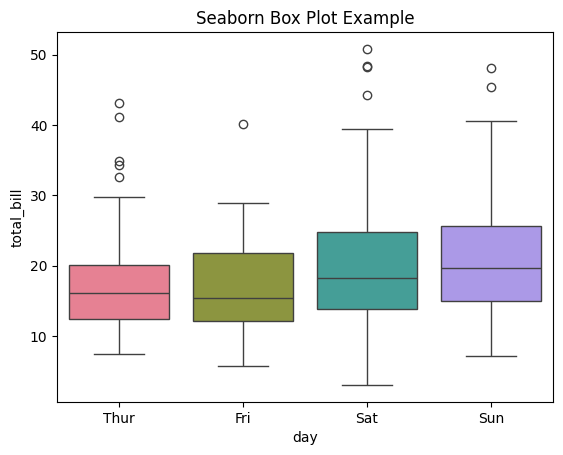

In [80]:
# Sample data
data = sns.load_dataset('tips')
# print(data)

# Create a box plot
sns.boxplot(x = 'day', y = 'total_bill', data = data, palette = 'husl')

# Add a title
plt.title('Seaborn Box Plot Example')

# Show the plot
plt.show()


The box plot shows the distribution of total bills for each day, allowing comparison of central tendency, spread, and potential outliers. The median line within the box indicates central tendency, while the box size and whisker length indicate variability. Outliers outside the whiskers indicate unusually large total bills, such as 'Thur' with high outliers.


#### Code Explanation
- We load a sample dataset (the Tips dataset in this case).
- **sns.boxplot(x="day", y="total_bill", data=data, palette="husl")**: This line creates a box plot, displaying the distribution of total_bill for each day. The palette argument specifies the color palette.
- **plt.title('Seaborn Box Plot Example')**: This line adds a title to the plot.
- **plt.show()**: This function displays the box plot.


### Heatmap
Heatmaps are used to visualize relationships and patterns in a matrix by color-coding values. We use heatmaps to display correlation matrices, visualize hierarchies, or explore patterns in large datasets where it’s important to see relationships between variables. Each cell in the heatmap is colored based on the value it represents. Darker colors indicate higher values, while lighter colors indicate lower values.

We will create a heatmap using Seaborn to visualize a correlation matrix.

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]
year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    1

/var/folders/hs/32dmfyx50snbg6rwbnbllt8434c9pj/T/ipykernel_31597/1893404967.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  corr_matrix = data.pivot_table(index = 'month', columns = 'year', values = 'passengers')


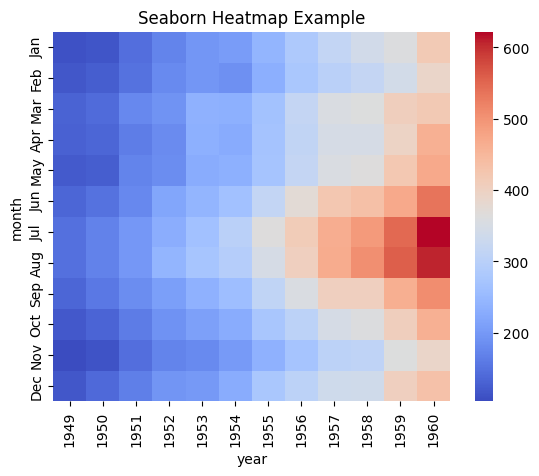

In [85]:
# Sample data: correlation matrix
data = sns.load_dataset("flights")
print(data)
corr_matrix = data.pivot_table(index = 'month', columns = 'year', values = 'passengers')
print(corr_matrix)
# Create a pivot table so on the y-axis we see the index = months
# on the x-axis (columns) we focus on year
# the values (color boxes) are a representation of the passengers 

# Create a heatmap
sns.heatmap(corr_matrix, cmap = "coolwarm")

# Add a title
plt.title('Seaborn Heatmap Example')

# Show the plot
plt.show()

The heatmap allows us to observe seasonal trends in passenger numbers. For example, there is a clear increase in passengers during the summer months of June, July, and August. 

By looking across the years, we can identify patterns and changes in passenger numbers. For example, there seems to be a gradual increase in passengers over the years. Darker or warmer colors in cells indicate higher passenger counts, while lighter cells indicate lower counts. This provides a visual representation of the variation in passenger numbers across months and years.

The darkest cell corresponds to July 1960, suggesting it had the highest number of passengers during the observed period. Conversely, the lightest or cold colored cells correspond to January and February of 1949, indicating lower passenger numbers.

**Key Features of a Heatmap**
- Colors Represent Values: In a heatmap, the colors correspond to data values, with different shades or colors indicating different levels. Typically, darker colors represent lower values, and lighter or warmer colors represent higher values (or vice versa, depending on the color scheme).
- Axes for Rows and Columns: Heatmaps have two axes—rows and columns. These might represent different categories, variables, or observations. You can label these axes to give context to what the colors represent.
- Color Scales: Heatmaps use color scales to depict the range of values. This scale helps you understand what each color means in terms of numerical data.


#### Code Explanation
- We load a sample dataset (the Flights dataset in this case) and create a correlation matrix using **pivot_table()**.
- **sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")**: This line creates a heatmap that visualizes the correlation matrix. The annot argument adds numerical annotations to the cells, and the cmap argument specifies the color map.
- **plt.title('Seaborn Heatmap Example')**: This line adds a title to the plot.
- **plt.show()**: This function displays the heatmap.

### Scatter Plot with Regression Line

Seaborn's regplot function creates a scatter plot with a regression line, allowing for predictions about y based on x. The accuracy of these predictions depends on the strength of the linear relationship. The data points' proximity to the regression line indicates the strength of the relationship, while tighter clustering around the line suggests a stronger correlation. Seaborn automatically calculates and displays the regression line with confidence intervals.

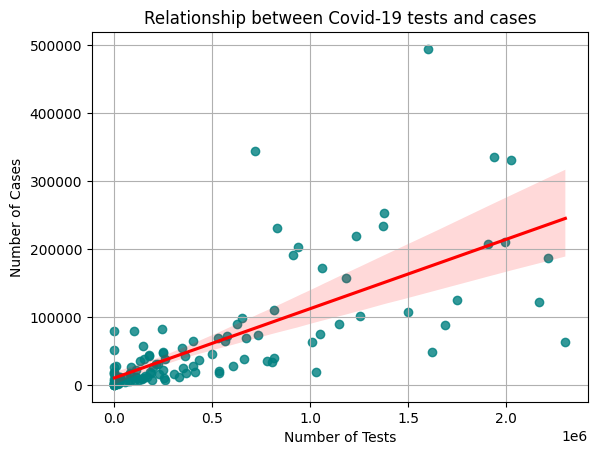

In [89]:
sns.regplot(data = df, x= 'Tests', y = 'Cases', scatter_kws = {'color':'teal'},
            line_kws = {'color':'red'})
plt.title('Relationship between Covid-19 tests and cases')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between the number of COVID-19 tests and the number of confirmed cases. Each dot represents a country, and the red line shows the overall trend. We can see that countries that did more testing usually reported more cases. This makes sense because the more you test, the more likely you are to find people who have the virus. Most countries are grouped in the lower part of the graph, meaning they had fewer tests and fewer cases, while a few had much higher numbers.

The regression line shows the overall trend or relationship between two variables — in this case, the number of COVID-19 tests (x-axis) and the number of confirmed cases (y-axis). It helps answer the question: "If testing increases, what happens to case numbers?" The upward slope of the line tells us that as the number of tests goes up, the number of cases also tends to go up.

The shaded area around the regression line is called the confidence interval. It shows the range where the true trend is likely to fall. The wider the shaded area, the less certain we are about the exact position of the line in that region. If it's narrow, we’re more confident in the trend shown.

## Plot and Save
Saving a figure during visualization is crucial to preserve and share the insights gained from the data. It ensures that the visual representation is accessible for future reference, analysis, and communication with others.

Here’s an example of how to create a simple line plot using Matplotlib and save it to an image file:


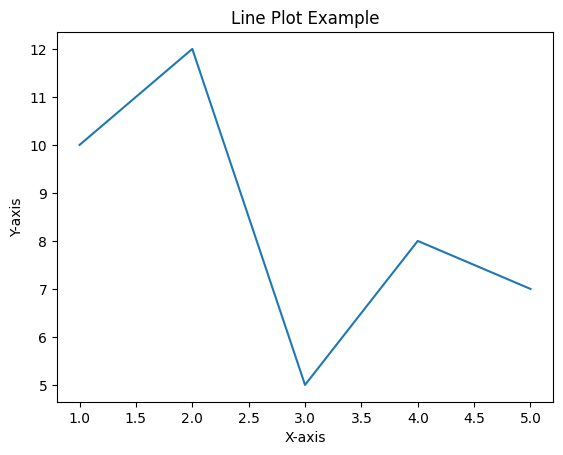

In [92]:
# Sample data
x = [1,2,3,4,5]
y = [10,12,5,8,7]

# Create a line plot
plt.plot(x,y)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Save the plot to an image file (e.g., PNG)
plt.savefig('Results/line_plot.png')

# Show the plot (optional)
plt.show()

The savefig function in Matplotlib is used to save a Matplotlib figure (plot) as an image file in various formats, such as PNG, JPEG, PDF, SVG, and more. It allows you to customize the output file format, resolution, and other parameters. Here are some key points about the savefig function:

In [16]:
# Save the plot as a PNG image with higher resolution and a white background
plt.savefig('my_plot.png', format = 'png', dpi = 300, 
            bbox_inches = 'tight', facecolor='white')